# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1696463497958.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,10/03/2023,4229.45,4269.75,4281.15,4216.45
1,10/02/2023,4288.39,4284.52,4300.58,4260.21
2,09/29/2023,4288.05,4328.18,4333.15,4274.86
3,09/28/2023,4299.70,4269.65,4317.27,4264.38
4,09/27/2023,4274.51,4282.63,4292.07,4238.63
...,...,...,...,...,...
2531,10/10/2013,1692.56,1660.88,1692.56,1660.88
2532,10/09/2013,1656.40,1656.99,1662.47,1646.47
2533,10/08/2013,1655.45,1676.22,1676.79,1655.03
2534,10/07/2013,1676.12,1687.15,1687.15,1674.70


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2536.000000,2536.000000,2536.000000,2536.000000
mean,2932.868620,2916.856936,2932.622019,2899.808431
std,890.596289,923.861912,930.260758,917.114102
min,1655.450000,0.000000,0.000000,0.000000
25%,2099.457500,2099.227500,2105.655000,2088.645000
50%,2745.230000,2745.500000,2760.815000,2727.510000
75%,3810.167500,3814.997500,3839.767500,3786.965000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,2940.446538,2940.043398,2955.933800,2922.859372
std,889.996420,890.006722,896.287559,883.394295
min,1655.450000,1656.990000,1662.470000,1646.470000
25%,2102.270000,2101.920000,2109.447500,2092.145000
50%,2749.620000,2753.110000,2766.150000,2737.340000
75%,3820.127500,3818.132500,3846.865000,3792.095000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2535
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

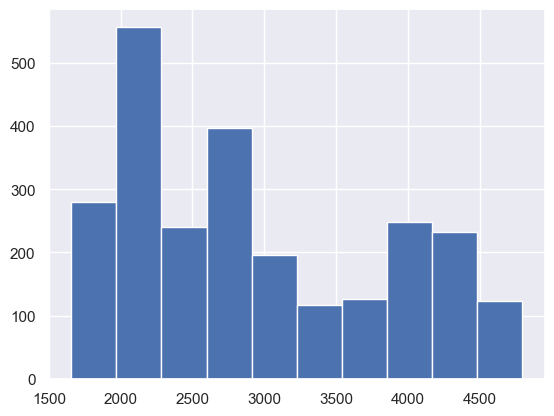

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4229.45

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2940.446538155812

In [10]:
close_sd = df['Close/Last'].std()
close_sd

889.9964195837352

In [11]:
sigma1 = close_mean + close_sd
sigma1

3830.442957739547

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4720.439377323282

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5165.43758711515

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2535
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-10-04 to 2023-10-03')

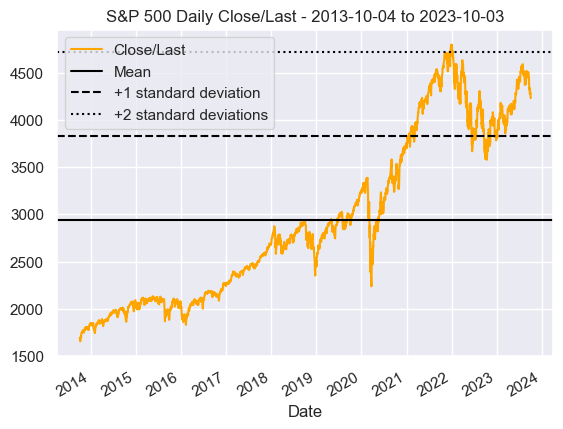

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-10-04 to 2023-10-03')

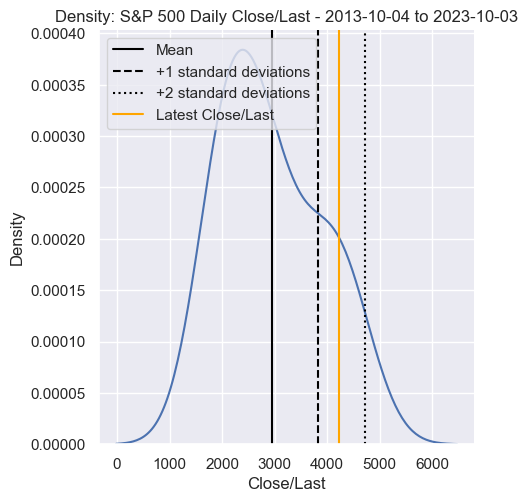

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.4483243229754499

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results